<a href="https://colab.research.google.com/github/camiPadilla/SIS420CP/blob/main/Primer_Parcial_120.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Implementar librerias
import os
#computacion vectorial y cientifica
import numpy as np
#libreria para graficar
from matplotlib import pyplot

from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D #Para graficar elementos 3D

#llama a mtplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [4]:
#Carga de dataset
data = pd.read_csv('/content/drive/MyDrive/datasets/PS_20174392719_1491204439457_log.csv', header=0, sep=',')

In [5]:
print(data)

         step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
#NOTA: Las transacciones que se detectan como fraude se cancelan,
#por lo que para la detección de fraude no se deben utilizar estas columnas:
#(oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest).

#Dado esos detalles , eliminamos columnas
columna_eliminar = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
data.drop(columna_eliminar, axis=1, inplace=True)
# axis igual a 1 para columnas, igual a 0 para filas
# inplace igual a true borra la columna en el dataframe original

In [8]:
# Convertimos las columnas categoricas en columnas numericas
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [9]:
#procesamiento de frases
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])
data[columnas_categoricas] = data[columnas_categoricas].astype('int64')

In [10]:
# observamos si nos faltan datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   nameDest        int64  
 5   isFraud         int64  
 6   isFlaggedFraud  int64  
dtypes: float64(1), int64(6)
memory usage: 339.8 MB


In [11]:
# Leemos el dataset y seleccionamos las columnas para X y y
X = data.iloc[:, :6]
y = data.iloc[:, 6]
m = y.size

In [12]:
print(X)
print('-'*15)
print(y)

         step  type      amount  nameOrig  nameDest  isFraud
0           1     3     9839.64    757869   1662094        0
1           1     3     1864.28   2188998   1733924        0
2           1     4      181.00   1002156    439685        1
3           1     1      181.00   5828262    391696        1
4           1     3    11668.14   3445981    828919        0
...       ...   ...         ...       ...       ...      ...
6362615   743     1   339682.13   5651847    505863        1
6362616   743     4  6311409.28   1737278    260949        1
6362617   743     1  6311409.28    533958    108224        1
6362618   743     4   850002.52   2252932    319713        1
6362619   743     1   850002.52    919229    534595        1

[6362620 rows x 6 columns]
---------------
0          0
1          0
2          0
3          0
4          0
          ..
6362615    0
6362616    0
6362617    0
6362618    0
6362619    0
Name: isFlaggedFraud, Length: 6362620, dtype: int64


In [13]:
# funcion de normalizacion
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [14]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

         step  type      amount  nameOrig  nameDest  isFraud
0           1     3     9839.64    757869   1662094        0
1           1     3     1864.28   2188998   1733924        0
2           1     4      181.00   1002156    439685        1
3           1     1      181.00   5828262    391696        1
4           1     3    11668.14   3445981    828919        0
...       ...   ...         ...       ...       ...      ...
6362615   743     1   339682.13   5651847    505863        1
6362616   743     4  6311409.28   1737278    260949        1
6362617   743     1  6311409.28    533958    108224        1
6362618   743     4   850002.52   2252932    319713        1
6362619   743     1   850002.52    919229    534595        1

[6362620 rows x 6 columns]
Media calculada: step        2.433972e+02
type        1.714150e+00
amount      1.798619e+05
nameOrig    3.176678e+06
nameDest    7.464270e+05
isFraud     1.290820e-03
dtype: float64
Desviación estandar calculada: step        1.423320e+02
ty

In [15]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [16]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [17]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agrega el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [18]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    #epsilon = 1e-8

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [19]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-3.85485601e+00  9.70544117e-05  7.24899400e-05  4.13900226e-04
  2.69445970e-05 -1.10612484e-05  1.72260937e-03]
El resultado entre falso o verdadero es (usando el descenso por el gradiente):1


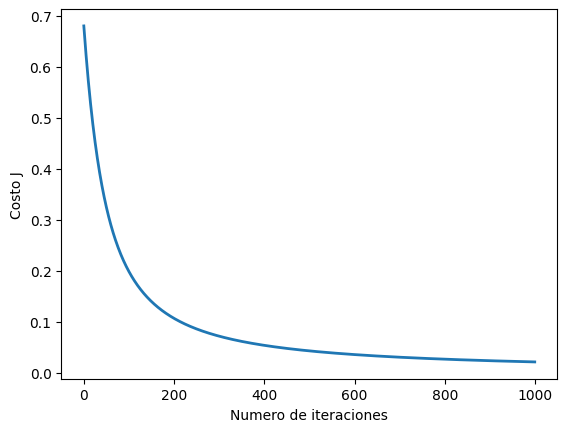

In [20]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.05
num_iters = 1000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(7)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si hubo fraude o no
X_array = [1, 683,1,300000,11,1,1]
fuego = sigmoid(np.dot(X_array, theta))
print('El resultado entre falso o verdadero es (usando el descenso por el gradiente):{:.0f}'.format(fuego))